In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\ENV\\student_habits_performance.csv")
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [3]:
print(df.describe())

             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

In [4]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [5]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [6]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [7]:
df.corr(numeric_only=True)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


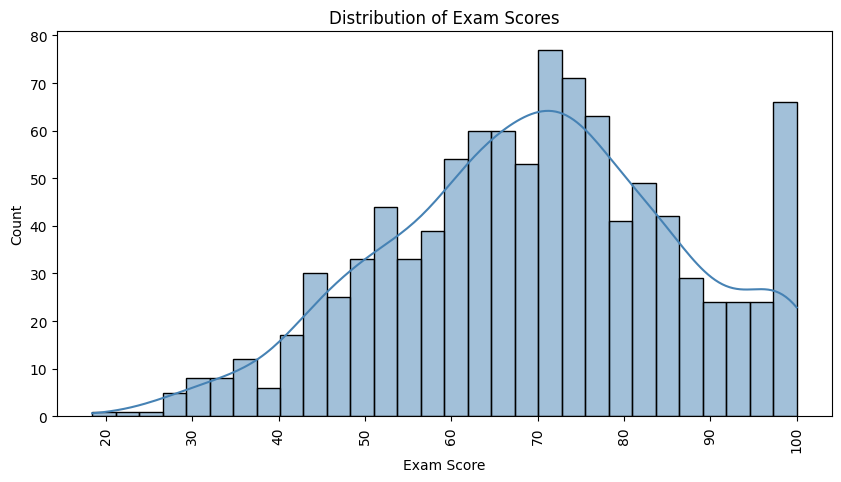

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['exam_score'], bins=30, kde=True, color='steelblue')
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.title("Distribution of Exam Scores")
plt.xticks(rotation=90)
plt.show()


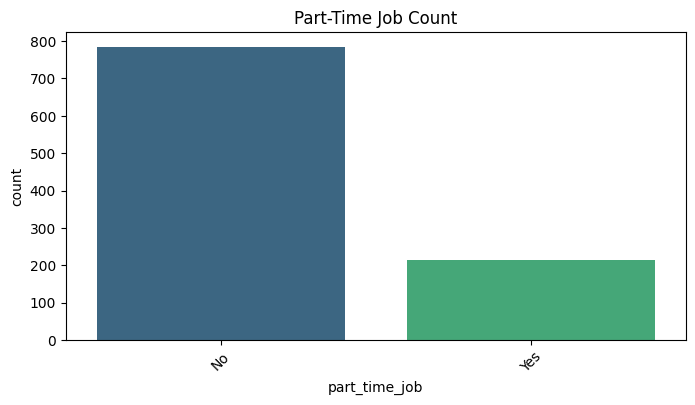

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='part_time_job', hue='part_time_job', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Part-Time Job Count")
plt.show()


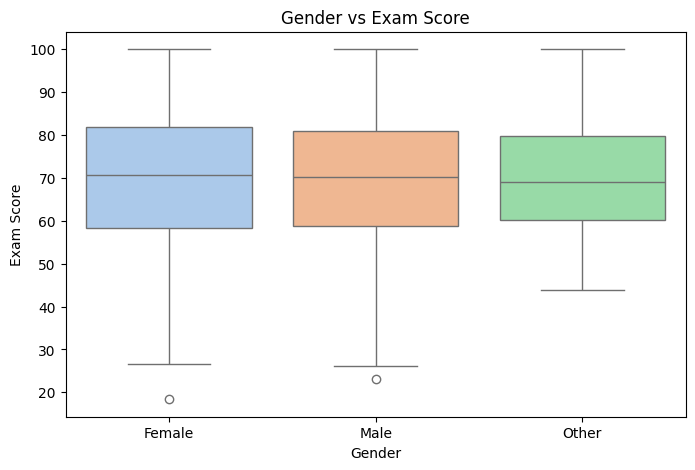

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="gender", y="exam_score", hue="gender", palette="pastel", legend=False)
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.title("Gender vs Exam Score")
plt.show()


In [11]:
# Remove outliers for exam_score using IQR
Q1 = df['exam_score'].quantile(0.25)
Q3 = df['exam_score'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df['exam_score'] >= lower) & (df['exam_score'] <= upper)]


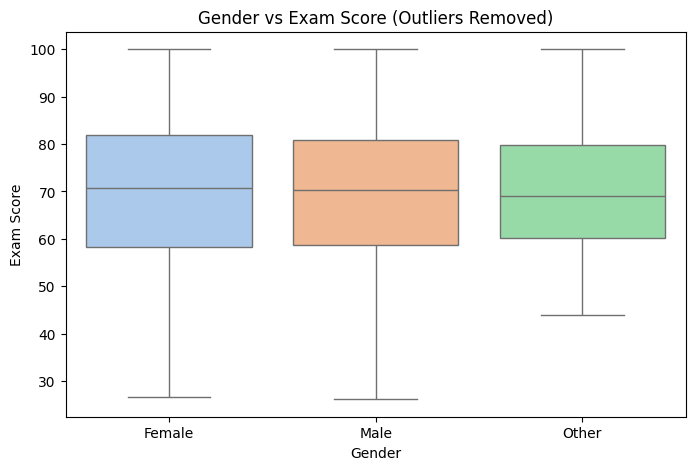

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_no_outliers, x="gender", y="exam_score",
            hue="gender", palette="pastel", legend=False)
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.title("Gender vs Exam Score (Outliers Removed)")
plt.show()

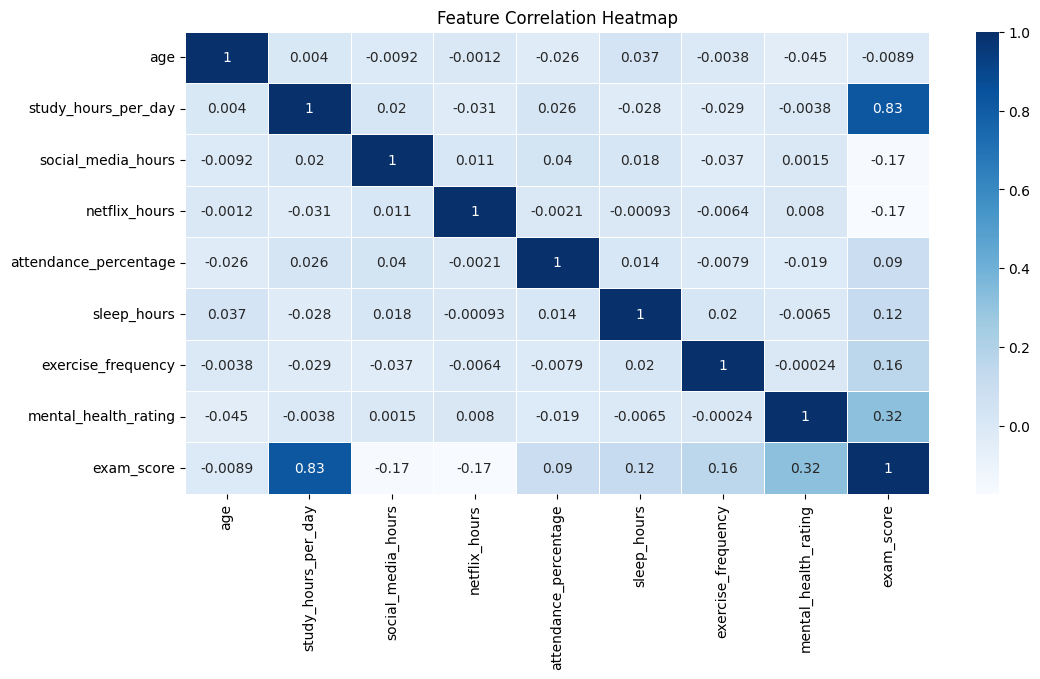

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [15]:
df = df_no_outliers   # use cleaned dataset


In [16]:
import numpy as np

conditions = [
    (df['exam_score'] <= 50),
    (df['exam_score'] > 50) & (df['exam_score'] <= 75),
    (df['exam_score'] > 75)
]

choices = [0, 1, 2]   # 0=Low, 1=Medium, 2=High

df['score_class'] = np.select(conditions, choices)


In [17]:
X = df.drop(['exam_score', 'score_class'], axis=1)
y = df['score_class']


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred)*100)


KNN Accuracy: 65.0


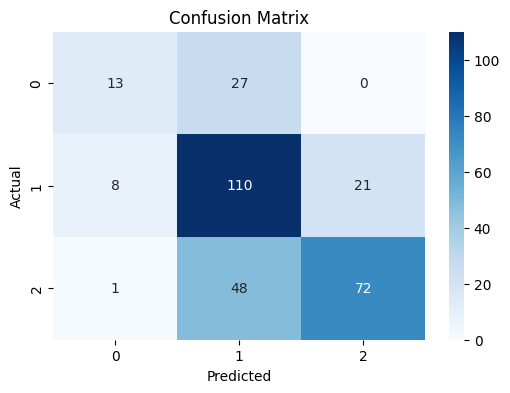

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.33      0.42        40
           1       0.59      0.79      0.68       139
           2       0.77      0.60      0.67       121

    accuracy                           0.65       300
   macro avg       0.65      0.57      0.59       300
weighted avg       0.67      0.65      0.64       300



In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, knn_pred))

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred)*100)


SVM Accuracy: 78.0


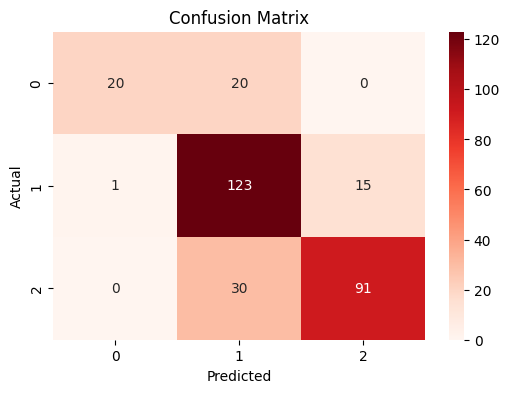

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.50      0.66        40
           1       0.71      0.88      0.79       139
           2       0.86      0.75      0.80       121

    accuracy                           0.78       300
   macro avg       0.84      0.71      0.75       300
weighted avg       0.80      0.78      0.78       300



In [34]:

cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Classification Report
print("Classification Report:")
print(classification_report(y_test, svm_pred))

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred)*100)


Decision Tree Accuracy: 73.66666666666667


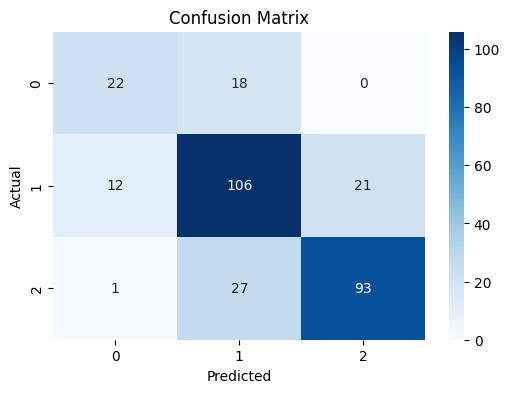

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        40
           1       0.70      0.76      0.73       139
           2       0.82      0.77      0.79       121

    accuracy                           0.74       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.74      0.74      0.74       300



In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_pred))

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)
nb_pred = nb_clf.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred)*100)


Naive Bayes Accuracy: 80.33333333333333


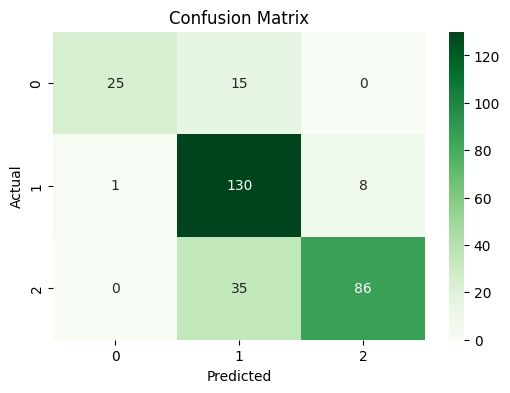

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.62      0.76        40
           1       0.72      0.94      0.82       139
           2       0.91      0.71      0.80       121

    accuracy                           0.80       300
   macro avg       0.87      0.76      0.79       300
weighted avg       0.83      0.80      0.80       300



In [31]:
# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2️⃣ Classification Report
print("Classification Report:")
print(classification_report(y_test, nb_pred))

In [32]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, knn_pred) * 100
accuracy_nb  = accuracy_score(y_test, nb_pred) * 100
accuracy_svm = accuracy_score(y_test, svm_pred) * 100
accuracy_dt  = accuracy_score(y_test, dt_pred) * 100


print("KNN Accuracy:", accuracy_knn)
print("Naive Bayes Accuracy:", accuracy_nb)
print("SVM Accuracy:", accuracy_svm)
print("Decision Tree Accuracy:", accuracy_dt)



KNN Accuracy: 65.0
Naive Bayes Accuracy: 80.33333333333333
SVM Accuracy: 78.0
Decision Tree Accuracy: 73.66666666666667


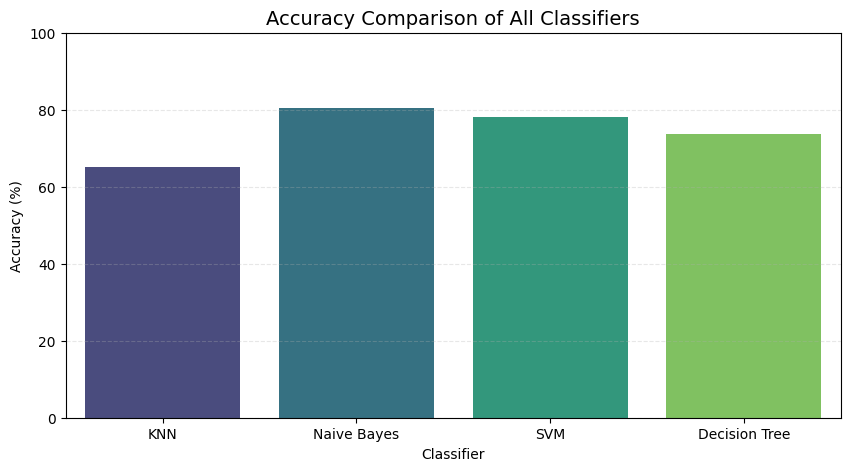

In [33]:
model_names = ["KNN", "Naive Bayes", "SVM", "Decision Tree"]

accuracy_values = [accuracy_knn, accuracy_nb, accuracy_svm, accuracy_dt]

plt.figure(figsize=(10,5))
sns.barplot(
    x=model_names, 
    y=accuracy_values, 
    hue=model_names,        # <- required to use palette safely
    palette="viridis",
    legend=False            # <- remove unnecessary legend
)
plt.title("Accuracy Comparison of All Classifiers", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.xlabel("Classifier")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

